Sales Data Sample:
    Year  UK_Bugatti_Registered  Estimated_Revenue  Profit_Margin  \
19  2024                     75          150000000       0.143684   
20  2025                     80          160000000       0.191778   
21  2026                     84          168000000       0.120924   
22  2027                     88          176000000       0.143822   
23  2028                     95          190000000       0.154954   

    Estimated_Profit  
19      2.155266e+07  
20      3.068447e+07  
21      2.031525e+07  
22      2.531262e+07  
23      2.944131e+07  

Demographics Sample:
     Year      Region Buyer_Age_Group  Count
0  2005.0      London             <35      0
1  2005.0      London           35-50      0
2  2005.0      London           50-65      0
3  2005.0      London             65+      1
4  2005.0  South East             <35      0


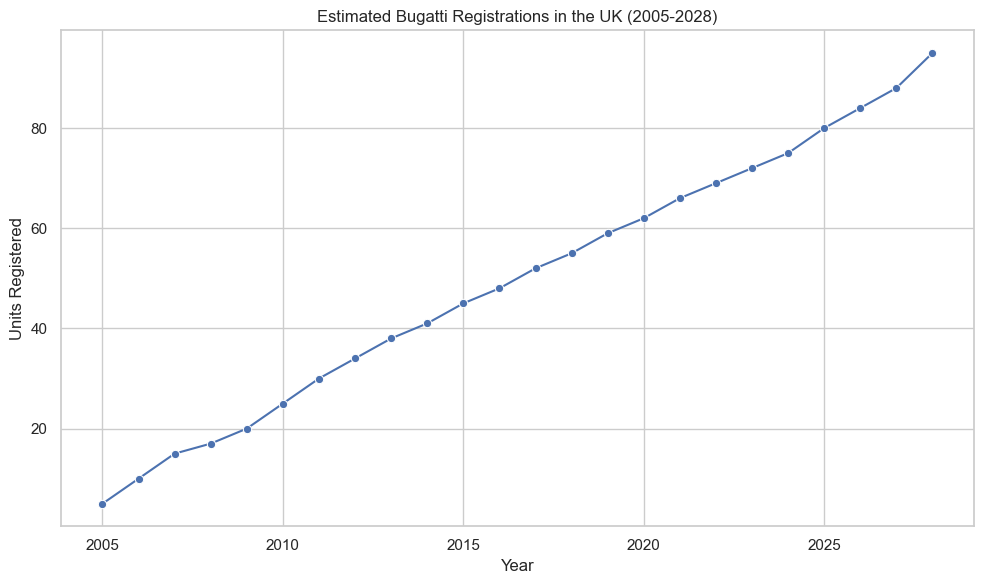

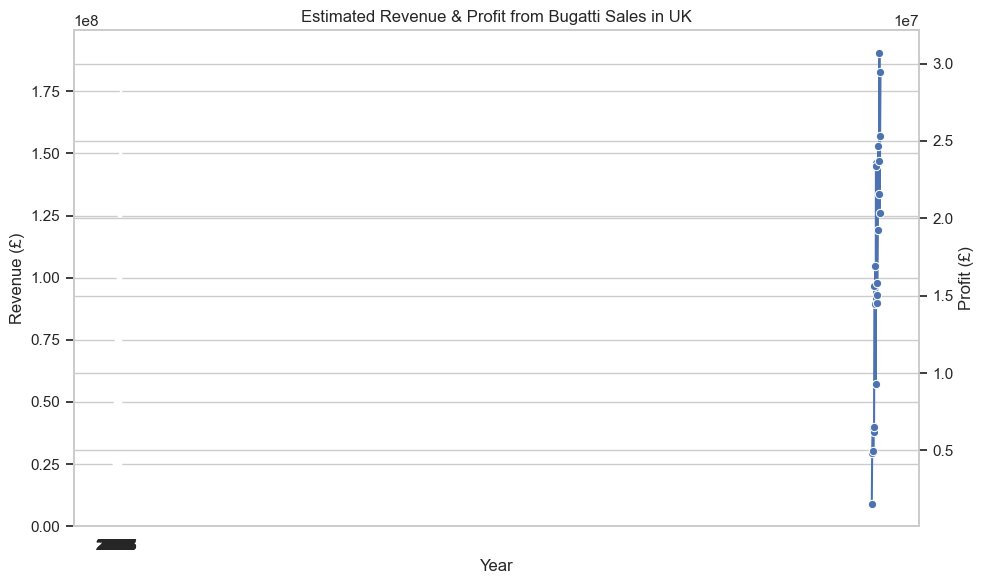

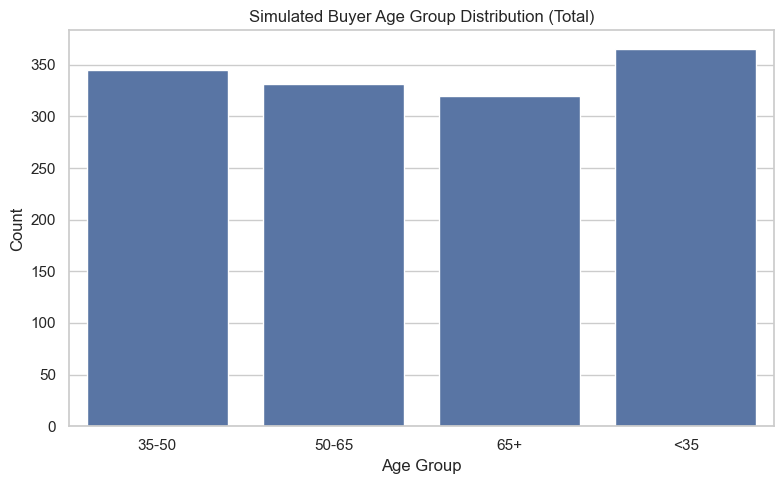

Datasets saved successfully!


In [2]:
# ---
# 1) IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# ---
# 2) CREATE BUGATTI UK SALES DATA
# Synthetic yearly registrations (NOT cumulative)
uk_registered = [
    5, 10, 15, 17, 20, 25, 30, 34, 38, 41, 45, 48,
    52, 55, 59, 62, 66, 69, 72, 75, 80, 84, 88, 95
]

# Dynamically generate matching years
years = list(range(2005, 2005 + len(uk_registered)))

# Create DataFrame
sales_df = pd.DataFrame({
    "Year": years,
    "UK_Bugatti_Registered": uk_registered
})

# ---
# 3) ESTIMATE REVENUE & PROFIT

avg_selling_price = 2_000_000  # £2M average price assumption

sales_df["Estimated_Revenue"] = (
    sales_df["UK_Bugatti_Registered"] * avg_selling_price
)

# Synthetic profit margins between 10% and 25%
np.random.seed(42)
sales_df["Profit_Margin"] = np.random.uniform(
    0.10, 0.25, len(sales_df)
)

sales_df["Estimated_Profit"] = (
    sales_df["Estimated_Revenue"] * sales_df["Profit_Margin"]
)

# ---
# 4) CREATE SYNTHETIC DEMOGRAPHICS

age_groups = ["<35", "35-50", "50-65", "65+"]
regions = ["London", "South East", "Midlands", "North", "Scotland", "Wales"]

demo_data = []

np.random.seed(100)

for _, row in sales_df.iterrows():
    year = row["Year"]
    total = row["UK_Bugatti_Registered"]

    for region in regions:
        for age in age_groups:
            count = np.random.poisson(lam=max(total / 20, 0.5))
            demo_data.append({
                "Year": year,
                "Region": region,
                "Buyer_Age_Group": age,
                "Count": count
            })

demo_df = pd.DataFrame(demo_data)

# ---
# 5) VIEW DATA

print("Sales Data Sample:")
print(sales_df.tail())

print("\nDemographics Sample:")
print(demo_df.head())

# ---
# 6) PLOT SALES TREND

plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Year",
    y="UK_Bugatti_Registered",
    data=sales_df,
    marker="o"
)
plt.title("Estimated Bugatti Registrations in the UK (2005-2028)")
plt.ylabel("Units Registered")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# ---
# 7) REVENUE & PROFIT VISUALISATION

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

sns.barplot(
    x="Year",
    y="Estimated_Revenue",
    data=sales_df,
    ax=ax1
)

sns.lineplot(
    x="Year",
    y="Estimated_Profit",
    data=sales_df,
    marker="o",
    ax=ax2
)

ax1.set_ylabel("Revenue (£)")
ax2.set_ylabel("Profit (£)")

plt.title("Estimated Revenue & Profit from Bugatti Sales in UK")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---
# 8) DEMOGRAPHICS VISUALISATION

agg_demo = (
    demo_df
    .groupby("Buyer_Age_Group", as_index=False)["Count"]
    .sum()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x="Buyer_Age_Group",
    y="Count",
    data=agg_demo
)

plt.title("Simulated Buyer Age Group Distribution (Total)")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

# ---
# 9) SAVE DATASETS

sales_df.to_csv("bugatti_uk_sales.csv", index=False)
demo_df.to_csv("bugatti_uk_demographics.csv", index=False)

print("Datasets saved successfully!")